In [37]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL.ImageOps as ImageOps
from scipy import fftpack, ndimage

# import bokeh
#%matplotlib notebook

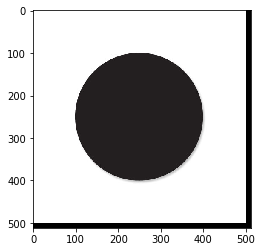

In [113]:
# img = Image.open('binary.jpg')
#img = ImageOps.invert(img)
#img = ImageOps.crop(img(x0, x1, height, width))
#img = Image.open('sample1-E10p5 artery-pseudo-binarized vessels.tif')
img = Image.open('circ.jpg')
x0, y0 = 0,0

win = 512

img = img.crop((x0, y0, x0 + win, y0 + win)) #(x0, y0, x1, y1)
plt.imshow(img);

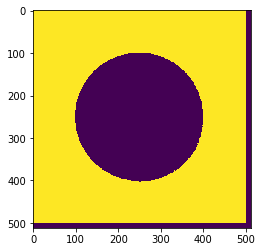

In [125]:
# img = Image.open('test-pattern.jpg').convert('L')
#img = img.convert('L') # Convert to monochrome
#img = img.convert('1') # Convert to black and white #FFT seems to make more sense this way



def binarize_image(img_path, threshold):
    """Binarize an image."""
    image_file = img_path
    image = image_file.convert('L')  # convert image to monochrome
    image = np.array(image)
    image = binarize_array(image, threshold)
    return image


def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    numpy_array[numpy_array > threshold] = 255
    numpy_array[numpy_array <= threshold] = 0
#     for i in range(len(numpy_array)):
#         for j in range(len(numpy_array[0])):
#             if numpy_array[i][j] > threshold:
#                 numpy_array[i][j] = 255
#             else:
#                 numpy_array[i][j] = 0
    return numpy_array


newbinary = binarize_image(img, 200)
plt.imshow(newbinary)

In [126]:

#plt.imshow(img);

In [127]:
img.size

(512, 512)

In [128]:
img_array = np.array(newbinary)

In [129]:
img_array.shape

(512, 512)

In [130]:
#img_fft = np.fft.fftn(img_array)
img_fft = np.fft.fft2(img_array)
print(img_fft)

[[45484605.             +0.j          9919983.53843199+834565.59948193j
  -2021432.3908602 -303705.26374185j ...
  -3631667.82654398+931393.47574694j -2021432.3908602 +303705.26374185j
   9919983.53843199-834565.59948193j]
 [ 9908349.84024735+608598.56051077j -6317641.11623563-957041.16722724j
  -1012231.15967625-232198.15330816j ...
   1902439.34338645-368104.57392211j  -957649.49390397+116369.28974802j
  -6504892.15356569+136521.23168195j]
 [-1983040.2782962 -293085.78783856j -1028588.69290556-194176.20487383j
   2322744.60715907+688528.66238571j ...
   -553348.09646207 +68123.1836269j   2434042.39080441 -88387.5697457j
   -985727.9384365  -71008.4794448j ]
 ...
 [-3657976.94994599+791602.48645088j  1916888.4215303 -222063.30089087j
   -541517.13394468  +3483.37928392j ...
   -884641.07743558+397208.22645278j  -430180.66547295+168309.91737168j
   1822210.4439914 -510778.09093645j]
 [-1983040.2782962 +293085.78783856j  -985727.9384365  +71008.4794448j
   2434042.39080441 +88387.569745

In [131]:
img_fft.shape

(512, 512)

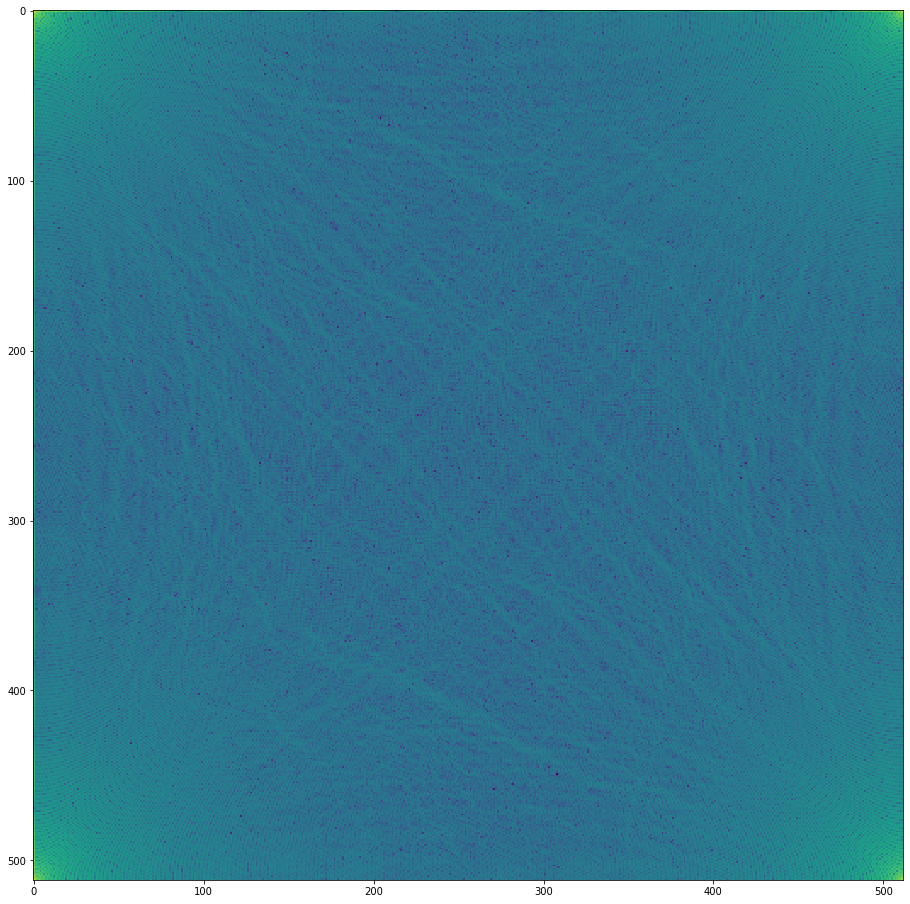

In [132]:
fig, ax = plt.subplots(1,1, figsize=(16,16))

# plt.imshow(np.log(np.abs(np.fft.fftshift(img_fft))**2));
ax.imshow(np.log(np.abs(img_fft+1)));
#print(np.log(np.abs(img_fft))

In [133]:
# https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
# https://het.as.utexas.edu/HET/Software/Numpy/reference/routines.fft.html#module-numpy.fft

In [134]:
hist_array = np.log(np.abs(img_fft+1))
hist_array = hist_array.flat

(array([3.20000e+01, 6.76000e+02, 1.41310e+04, 1.56973e+05, 8.20110e+04,
        6.71800e+03, 1.34800e+03, 2.38000e+02, 1.40000e+01, 3.00000e+00]),
 array([ 2.43472508,  3.95454102,  5.47435696,  6.9941729 ,  8.51398884,
        10.03380479, 11.55362073, 13.07343667, 14.59325261, 16.11306855,
        17.6328845 ]),
 <a list of 10 Patch objects>)

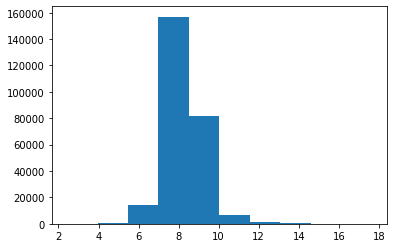

In [135]:
plt.hist(hist_array)